In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/assessment')

Mounted at /content/drive


In [ ]:
!pip install tqdm

# Step 1: Clean and prepare the datasets 

In [ ]:
import pandas as pd

jobtitle_seniority = pd.read_csv('jobtitle_seniority.csv', encoding='utf-8')
positions = pd.read_csv('positions.csv', encoding='utf-8')
education = pd.read_csv('education.csv', encoding='utf-8')

## clean `position` dataset

In [ ]:
positions = pd.read_csv('positions.csv', encoding='utf-8')

In [ ]:
import numpy as np
from datetime import date

today = date.today()

#replace nan to today's date, as it is probable that having no enddate means it is the user_id's current position.
positions['enddate'] = positions['enddate'].replace(np.nan, today) 


In [ ]:
#convert to datetime
positions['startdate'] = pd.to_datetime(positions['startdate'])
positions['enddate'] = pd.to_datetime(positions['enddate'])


In [ ]:
df_end = positions.groupby('user_id').max().reset_index()[['user_id','enddate']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


In [ ]:
df_start = positions.groupby('user_id').min().reset_index()[['user_id','startdate']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


In [ ]:
#to calculate the total career duration, i selected MIN value of work startdate and MAX value of work enddate
df_startend = df_start.merge(df_end, how = 'left', on = 'user_id')

In [ ]:
#testing 
df_startend[df_startend['user_id']=='++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==']

,user_id,startdate,enddate
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,1997-12-01,2022-04-09


In [ ]:
#create a new column for the number of work years.

df_startend['workyear'] = df_startend['enddate'] - df_startend['startdate']
df_startend['workyear'] 

0       25300 days
1       13704 days
2        2869 days
3        4665 days
4        8895 days
           ...    
81459   11170 days
81460    6460 days
81461    9960 days
81462   11056 days
81463    2716 days
Name: workyear, Length: 81464, dtype: timedelta64[ns]

In [ ]:
from tqdm import tqdm
for i in tqdm(range(len(df_startend))):
  df_startend.loc[i,'workyear'] = df_startend.loc[i,'workyear'].days

100%|██████████| 81464/81464 [03:00<00:00, 450.22it/s]


In [ ]:
df_startend 


,user_id,startdate,enddate,workyear
0,++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,1953-01-01,2022-04-09,25300
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,1984-10-01,2022-04-09,13704
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,2014-06-01,2022-04-09,2869
3,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,2009-07-01,2022-04-09,4665
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,1997-12-01,2022-04-09,8895
...,...,...,...,...
81459,zzVjGj6yusqUwYDuy+sXmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,1966-08-01,1997-03-01,11170
81460,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,2004-08-01,2022-04-09,6460
81461,zzdHAVxl9iQrwom22S/FLg5+2cvffV/mNepQVJd0smgtpB...,1995-01-01,2022-04-09,9960
81462,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,1992-01-01,2022-04-09,11056


In [ ]:
#I selected workyear only greater than zero, because there were some raw data that had enddate earlier than startdate,
# resulting in having negative values of workyear. (ie. startdate was in 2014 but enddate was 2004.)

df_startend = df_startend[df_startend['workyear']>0]

In [ ]:
#likewise, I also excluded extreme startdate values such as 1920s, 
#as it is very unlikely that a user_id who started work in 1920 will still be working now.

df_startend = df_startend[ df_startend['workyear'] < 15000]


In [ ]:
#change the names of startdate, enddate columns as these variables appear in Education csv file as well. 
df_startend = df_startend.rename(columns={'startdate': 'work_startdate', 'enddate': 'work_enddate'})

In [ ]:
#covert the number of days to the number of years by dividing by 365 days/year

df_startend['workyear'] = (df_startend['workyear'])/365

df_startend

,user_id,work_startdate,work_enddate,workyear
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,1984-10-01,2022-04-09,37.545205
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,2014-06-01,2022-04-09,7.860274
3,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,2009-07-01,2022-04-09,12.780822
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,1997-12-01,2022-04-09,24.369863
5,++8qqHNDQSyp1Yd45ROBZg5+2cvffV/mNepQVJd0smgtpB...,2000-01-01,2022-04-09,22.284932
...,...,...,...,...
81459,zzVjGj6yusqUwYDuy+sXmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,1966-08-01,1997-03-01,30.60274
81460,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,2004-08-01,2022-04-09,17.69863
81461,zzdHAVxl9iQrwom22S/FLg5+2cvffV/mNepQVJd0smgtpB...,1995-01-01,2022-04-09,27.287671
81462,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,1992-01-01,2022-04-09,30.290411


In [ ]:
df_startend

,user_id,work_startdate,work_enddate,workyear
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,1984-10-01,2022-04-09,37.545205
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,2014-06-01,2022-04-09,7.860274
3,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,2009-07-01,2022-04-09,12.780822
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,1997-12-01,2022-04-09,24.369863
5,++8qqHNDQSyp1Yd45ROBZg5+2cvffV/mNepQVJd0smgtpB...,2000-01-01,2022-04-09,22.284932
...,...,...,...,...
81459,zzVjGj6yusqUwYDuy+sXmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,1966-08-01,1997-03-01,30.60274
81460,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,2004-08-01,2022-04-09,17.69863
81461,zzdHAVxl9iQrwom22S/FLg5+2cvffV/mNepQVJd0smgtpB...,1995-01-01,2022-04-09,27.287671
81462,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,1992-01-01,2022-04-09,30.290411


## clean `education` dataset

In [ ]:
education = pd.read_csv('education.csv', encoding='utf-8')

In [ ]:
education = education.rename(columns={'startdate': 'school_startdate', 'enddate': 'school_enddate'})

In [ ]:
education['major'] =education['major'].str.lower()

In [ ]:
#drop missing values.
education = education.dropna(subset = ['major'])
education = education.dropna(subset = ['school_startdate'])

In [ ]:
education

,user_id,major,school_startdate,school_enddate
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,master of viticulture,2006-01-01,2008-01-01
1,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,bachelor of horticulture,2001-01-01,2005-01-01
2,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,wset level 3,2015-01-01,2015-01-01
3,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,graduated diploma,2008-01-01,2009-01-01
4,H2fZcOtCvd7DXFbzglIkpA5+2cvffV/mNepQVJd0smgtpB...,lingüística aplicada en la enseñanza del inglé...,2013-01-01,2016-01-01
...,...,...,...,...
226177,T7lG/nB8PM+lLHLXwfqD0w4ZM3TcQvn1bQ/jHgHWG0kf/b...,phd,2002-01-01,2008-01-01
226178,kTlIZZU3vXt4Q90RzMQUAQ5+2cvffV/mNepQVJd0smgtpB...,economista con énfasis en admnistración de emp...,1991-01-01,1997-01-01
226179,aGjVX+XXGchYAvFGnSzsiA4ZM3TcQvn1bQ/jHgHWG0kf/b...,bachelor&#39;s degree,1985-01-01,1990-01-01
226180,b4QpP+7Znqa9aGluCEMJKQ5+2cvffV/mNepQVJd0smgtpB...,master's degree,2016-01-01,2017-01-01


In [ ]:
#I chose to work only with bachelor's degree, as most people start bachelor's degree when they graduated from high school at age 18,
#and it is more systematic to use this fact to calcuate age.
# I did not use master's or phd to predict age, because the starting age for these degrees varies greatly and it is difficult to generalize.
# I did not use high school info, as there are only 3500 data available, and for simplicity, decided to only use bachelor's info. 

print('Bachelor:', education.major.str.contains(r'bachelor').sum())
print('Master:', education.major.str.contains(r'master').sum())
print('high school:', education.major.str.contains(r'high school').sum())
print('phD:', education.major.str.contains(r'phd').sum())

Bachelor: 34094
Master: 17288
high school: 3524
phD: 1402


In [ ]:
education_bc = education[education['major'].str.contains('bachelor')]

In [ ]:
education_bc['school_startdate'] = pd.to_datetime(education_bc['school_startdate'])
education_bc['school_enddate'] = pd.to_datetime(education_bc['school_enddate'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#calculate duration of studies 

education_bc['studyyear'] = education_bc['school_enddate'] - education_bc['school_startdate']

#indexing
education_bc.index = range(len(education_bc))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from tqdm import tqdm
for i in tqdm(range(len(education_bc))):
  education_bc.loc[i,'studyyear'] = education_bc.loc[i,'studyyear'].days / 365

  0%|          | 0/34094 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
100%|██████████| 34094/34094 [00:40<00:00, 839.96it/s] 


In [ ]:
#among the user_ids, I chose to work only with users who went to university for more than two years and less than 7 years.
education_bc = education_bc[education_bc['studyyear']<7]
education_bc = education_bc[education_bc['studyyear']>2]
education_bc = education_bc.drop_duplicates(subset=['user_id'])
education_bc.index = range(len(education_bc))

In [ ]:
from datetime import date
import datetime 
today = datetime.datetime.now()
#today = today.year
#today = int(today)
#type(today)

In [ ]:
today

datetime.datetime(2022, 4, 9, 17, 19, 0, 684505)

In [ ]:
education_bc['age_edu'] = today -  education_bc['school_startdate']
education_bc['age_edu']

0        7768 days 17:19:00.684505
1       15439 days 17:19:00.684505
2        5212 days 17:19:00.684505
3        4116 days 17:19:00.684505
4        9229 days 17:19:00.684505
                   ...            
25531   10690 days 17:19:00.684505
25532   10690 days 17:19:00.684505
25533    6673 days 17:19:00.684505
25534    3385 days 17:19:00.684505
25535   13612 days 17:19:00.684505
Name: age_edu, Length: 25536, dtype: timedelta64[ns]

In [ ]:
education_bc['years_since_bachelor'] = None
for i in tqdm(range(len(education_bc))):
  education_bc.loc[i,'years_since_bachelor'] = education_bc.loc[i,'age_edu'].days / 365


100%|██████████| 25536/25536 [00:22<00:00, 1154.58it/s]


In [ ]:
education_bc['age'] = education_bc['years_since_bachelor'] + 18

In [ ]:
education_bc['age']

0        39.282192
1         60.29863
2        32.279452
3        29.276712
4        43.284932
           ...    
25531    47.287671
25532    47.287671
25533    36.282192
25534    27.273973
25535    55.293151
Name: age, Length: 25536, dtype: object

In [ ]:
education_bc

,user_id,major,school_startdate,school_enddate,studyyear,age_edu,years_since_bachelor,age
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,bachelor of horticulture,2001-01-01,2005-01-01,4.00274,7768 days 17:19:00.684505,21.282192,39.282192
1,ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/b...,bachelor of science (bsc),1980-01-01,1983-01-01,3.00274,15439 days 17:19:00.684505,42.29863,60.29863
2,QUs/KweU0yMBVoO7pkg5PA5+2cvffV/mNepQVJd0smgtpB...,bachelor of science (b.s.),2008-01-01,2012-01-01,4.00274,5212 days 17:19:00.684505,14.279452,32.279452
3,jQ4VW6tIpKX4Nola+m/5bQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,bachelor's degree,2011-01-01,2015-01-01,4.00274,4116 days 17:19:00.684505,11.276712,29.276712
4,eDOp1EUVFso1NvHEKx4oSw5+2cvffV/mNepQVJd0smgtpB...,bachelor's degree,1997-01-01,2001-01-01,4.00274,9229 days 17:19:00.684505,25.284932,43.284932
...,...,...,...,...,...,...,...,...
25531,zOmkQXgpXeuNdLPP33grMw5+2cvffV/mNepQVJd0smgtpB...,bachelor of commerce (bcom),1993-01-01,1996-01-01,3.0,10690 days 17:19:00.684505,29.287671,47.287671
25532,jRp0G2i8/xctae8mqJMTT2EeezRFo+61bQ/jHgHWG0kf/b...,bachelor's degree,1993-01-01,1997-01-01,4.00274,10690 days 17:19:00.684505,29.287671,47.287671
25533,P/gSxJbxATJErQMY2XuJRg5+2cvffV/mNepQVJd0smgtpB...,bachelor of science,2004-01-01,2010-01-01,6.005479,6673 days 17:19:00.684505,18.282192,36.282192
25534,TkjOfaO2yBim6BWT+BHiPw5+2cvffV/mNepQVJd0smgtpB...,bachelor’s degree,2013-01-01,2016-01-01,3.0,3385 days 17:19:00.684505,9.273973,27.273973


In [ ]:
education_bc['user_id'].values

array(['hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==',
       'ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==',
       'QUs/KweU0yMBVoO7pkg5PA5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==', ...,
       'P/gSxJbxATJErQMY2XuJRg5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==',
       'TkjOfaO2yBim6BWT+BHiPw5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==',
       'aGjVX+XXGchYAvFGnSzsiA4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg=='],
      dtype=object)

In [ ]:
#I created a test set I could use for predictive model part, here I am selecting user_id that i did not use to calculate age.
education_others = education[~education['user_id'].isin(education_bc['user_id'].values)]

In [ ]:
education_others

,user_id,major,school_startdate,school_enddate
4,H2fZcOtCvd7DXFbzglIkpA5+2cvffV/mNepQVJd0smgtpB...,lingüística aplicada en la enseñanza del inglé...,2013-01-01,2016-01-01
5,H2fZcOtCvd7DXFbzglIkpA5+2cvffV/mNepQVJd0smgtpB...,licenciado en lenguas extranjeras,2005-01-01,2012-01-01
7,3VRjfXobf5CYummRNRjRlw5+2cvffV/mNepQVJd0smgtpB...,master of business administration (m.b.a.),2010-01-01,2015-01-01
8,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,ba,2008-01-01,2012-01-01
9,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,master's degree,2014-01-01,2016-01-01
...,...,...,...,...
226168,nI9LDOxo6zXPj+BclGZLkg5+2cvffV/mNepQVJd0smgtpB...,jornalista,1987-01-01,1991-01-01
226169,XadtYZwyi4e0U3pRIINIGA5+2cvffV/mNepQVJd0smgtpB...,b.m.,2010-01-01,2014-01-01
226174,QjsYHMIfJYcw5CI5aotqUQ5+2cvffV/mNepQVJd0smgtpB...,nyc regents diploma,1972-01-01,1976-01-01
226177,T7lG/nB8PM+lLHLXwfqD0w4ZM3TcQvn1bQ/jHgHWG0kf/b...,phd,2002-01-01,2008-01-01


## Clean `jobtitle_seniority` dataset

In [ ]:
jobtitle_seniority = pd.read_csv('jobtitle_seniority.csv', encoding='utf-8')

In [ ]:
jobtitle_seniority

,user_id,jobtitle,seniority
0,SbYa9XFYmy40AbpQIbr4cw5+2cvffV/mNepQVJd0smgtpB...,ict_manager,5.181348
1,5NTieg1m6jKFiY8Py3K+2jr+/k0/DTn/+K+fv+DIJSUQ20...,emergency_room_physician_assistant_banner_chur...,2.866780
2,R58XldIpOAmT8Tt3/x+2/w5+2cvffV/mNepQVJd0smgtpB...,marketing_promotions,3.559404
3,Ks30ggQyMuLYOykWc4EoXGEWBgzjpZvPNepQVJd0smgtpB...,central_billing_assistant_development_manager,4.175832
4,MLsEj4gLE8oHM+mWTMnRMg5+2cvffV/mNepQVJd0smgtpB...,navegador,3.767998
...,...,...,...
416290,ZSOjvStDYr039llu+FQe2A5+2cvffV/mNepQVJd0smgtpB...,prestadora_de_seviços_de_design_|_information_...,3.750685
416291,Ca0Cmg3KOHmQ4C+XuY1F2Q5+2cvffV/mNepQVJd0smgtpB...,research_fellow_|_research,3.582192
416292,6gc1HbmDe02uJYCw0BefLw4ZM3TcQvn1bQ/jHgHWG0kf/b...,post_doctorate_research_fellow_|_research,3.792466
416293,CbRNq3nds7RvMQBatG2Qe3AG1BvSkUYANepQVJd0smgtpB...,junior_project_manager_european_funds_|_inform...,6.920548


In [ ]:
#group by user_id, and add the number of workyears per jobtitle position (seniority) together. 

jobtitle_seniority = jobtitle_seniority.groupby('user_id', sort=True, as_index=False).sum()

jobtitle_seniority

,user_id,seniority
0,++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,7.064817
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,10.665753
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,34.692158
3,++6zEVtPCi83vpPTHSY2Vg5+2cvffV/mNepQVJd0smgtpB...,8.931100
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,32.580986
...,...,...
99995,zzdHAVxl9iQrwom22S/FLg5+2cvffV/mNepQVJd0smgtpB...,75.454819
99996,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,4.610625
99997,zzrbQXjc2yHwbWjtQ9F3mg5+2cvffV/mNepQVJd0smgtpB...,9.481821
99998,zzuZVPanBvW09lNk1C3h+Q5+2cvffV/mNepQVJd0smgtpB...,23.293759


## merge datasets

In [ ]:
#first merge eduation and jobtitle seniority
merge_edu_job = education_bc.merge(jobtitle_seniority, how = 'left', on = 'user_id')
merge_edu_job

,user_id,major,school_startdate,school_enddate,studyyear,age_edu,years_since_bachelor,age,seniority
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,bachelor of horticulture,2001-01-01,2005-01-01,4.00274,7768 days 17:19:00.684505,21.282192,39.282192,19.585092
1,ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/b...,bachelor of science (bsc),1980-01-01,1983-01-01,3.00274,15439 days 17:19:00.684505,42.29863,60.29863,36.921271
2,QUs/KweU0yMBVoO7pkg5PA5+2cvffV/mNepQVJd0smgtpB...,bachelor of science (b.s.),2008-01-01,2012-01-01,4.00274,5212 days 17:19:00.684505,14.279452,32.279452,13.962989
3,jQ4VW6tIpKX4Nola+m/5bQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,bachelor's degree,2011-01-01,2015-01-01,4.00274,4116 days 17:19:00.684505,11.276712,29.276712,11.534890
4,eDOp1EUVFso1NvHEKx4oSw5+2cvffV/mNepQVJd0smgtpB...,bachelor's degree,1997-01-01,2001-01-01,4.00274,9229 days 17:19:00.684505,25.284932,43.284932,8.792237
...,...,...,...,...,...,...,...,...,...
25531,zOmkQXgpXeuNdLPP33grMw5+2cvffV/mNepQVJd0smgtpB...,bachelor of commerce (bcom),1993-01-01,1996-01-01,3.0,10690 days 17:19:00.684505,29.287671,47.287671,16.970875
25532,jRp0G2i8/xctae8mqJMTT2EeezRFo+61bQ/jHgHWG0kf/b...,bachelor's degree,1993-01-01,1997-01-01,4.00274,10690 days 17:19:00.684505,29.287671,47.287671,17.217123
25533,P/gSxJbxATJErQMY2XuJRg5+2cvffV/mNepQVJd0smgtpB...,bachelor of science,2004-01-01,2010-01-01,6.005479,6673 days 17:19:00.684505,18.282192,36.282192,15.606050
25534,TkjOfaO2yBim6BWT+BHiPw5+2cvffV/mNepQVJd0smgtpB...,bachelor’s degree,2013-01-01,2016-01-01,3.0,3385 days 17:19:00.684505,9.273973,27.273973,11.443072


In [ ]:
#merge all three datasets by user_id

merge_edu_job_pos = merge_edu_job.merge(df_startend, how = 'left', on = 'user_id')
merge_edu_job_pos

,user_id,major,school_startdate,school_enddate,studyyear,age_edu,years_since_bachelor,age,seniority,work_startdate,work_enddate,workyear
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,bachelor of horticulture,2001-01-01,2005-01-01,4.00274,7768 days 17:19:00.684505,21.282192,39.282192,19.585092,2008-04-01,2022-04-09,14.030137
1,ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/b...,bachelor of science (bsc),1980-01-01,1983-01-01,3.00274,15439 days 17:19:00.684505,42.29863,60.29863,36.921271,1984-11-01,2022-04-09,37.460274
2,QUs/KweU0yMBVoO7pkg5PA5+2cvffV/mNepQVJd0smgtpB...,bachelor of science (b.s.),2008-01-01,2012-01-01,4.00274,5212 days 17:19:00.684505,14.279452,32.279452,13.962989,2006-10-01,2022-04-09,15.531507
3,jQ4VW6tIpKX4Nola+m/5bQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,bachelor's degree,2011-01-01,2015-01-01,4.00274,4116 days 17:19:00.684505,11.276712,29.276712,11.534890,NaT,NaT,NaN
4,eDOp1EUVFso1NvHEKx4oSw5+2cvffV/mNepQVJd0smgtpB...,bachelor's degree,1997-01-01,2001-01-01,4.00274,9229 days 17:19:00.684505,25.284932,43.284932,8.792237,2004-11-01,2022-04-09,17.446575
...,...,...,...,...,...,...,...,...,...,...,...,...
25531,zOmkQXgpXeuNdLPP33grMw5+2cvffV/mNepQVJd0smgtpB...,bachelor of commerce (bcom),1993-01-01,1996-01-01,3.0,10690 days 17:19:00.684505,29.287671,47.287671,16.970875,2002-05-01,2022-04-09,19.953425
25532,jRp0G2i8/xctae8mqJMTT2EeezRFo+61bQ/jHgHWG0kf/b...,bachelor's degree,1993-01-01,1997-01-01,4.00274,10690 days 17:19:00.684505,29.287671,47.287671,17.217123,2005-01-01,2022-04-09,17.279452
25533,P/gSxJbxATJErQMY2XuJRg5+2cvffV/mNepQVJd0smgtpB...,bachelor of science,2004-01-01,2010-01-01,6.005479,6673 days 17:19:00.684505,18.282192,36.282192,15.606050,2011-02-01,2022-04-09,11.191781
25534,TkjOfaO2yBim6BWT+BHiPw5+2cvffV/mNepQVJd0smgtpB...,bachelor’s degree,2013-01-01,2016-01-01,3.0,3385 days 17:19:00.684505,9.273973,27.273973,11.443072,2006-06-01,2022-04-09,15.865753


In [ ]:
#select only the columns I need 
merge_final = merge_edu_job_pos[['user_id','school_startdate','school_enddate','work_startdate','work_enddate',
                   'years_since_bachelor','seniority','workyear','age']]

In [ ]:
merge_final 

,user_id,school_startdate,school_enddate,work_startdate,work_enddate,years_since_bachelor,seniority,workyear,age
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,2001-01-01,2005-01-01,2008-04-01,2022-04-09,21.282192,19.585092,14.030137,39.282192
1,ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/b...,1980-01-01,1983-01-01,1984-11-01,2022-04-09,42.29863,36.921271,37.460274,60.29863
2,QUs/KweU0yMBVoO7pkg5PA5+2cvffV/mNepQVJd0smgtpB...,2008-01-01,2012-01-01,2006-10-01,2022-04-09,14.279452,13.962989,15.531507,32.279452
3,jQ4VW6tIpKX4Nola+m/5bQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,2011-01-01,2015-01-01,NaT,NaT,11.276712,11.534890,NaN,29.276712
4,eDOp1EUVFso1NvHEKx4oSw5+2cvffV/mNepQVJd0smgtpB...,1997-01-01,2001-01-01,2004-11-01,2022-04-09,25.284932,8.792237,17.446575,43.284932
...,...,...,...,...,...,...,...,...,...
25531,zOmkQXgpXeuNdLPP33grMw5+2cvffV/mNepQVJd0smgtpB...,1993-01-01,1996-01-01,2002-05-01,2022-04-09,29.287671,16.970875,19.953425,47.287671
25532,jRp0G2i8/xctae8mqJMTT2EeezRFo+61bQ/jHgHWG0kf/b...,1993-01-01,1997-01-01,2005-01-01,2022-04-09,29.287671,17.217123,17.279452,47.287671
25533,P/gSxJbxATJErQMY2XuJRg5+2cvffV/mNepQVJd0smgtpB...,2004-01-01,2010-01-01,2011-02-01,2022-04-09,18.282192,15.606050,11.191781,36.282192
25534,TkjOfaO2yBim6BWT+BHiPw5+2cvffV/mNepQVJd0smgtpB...,2013-01-01,2016-01-01,2006-06-01,2022-04-09,9.273973,11.443072,15.865753,27.273973


In [ ]:
# to create a train set, I included columns that can be use as X variables and the target variable (age)
# i did not choose work startdate/enddate because these columns were already used for calculating workyear column 
# i did not inlcude school startdate/enddate because these columns were used for calcuating age
merge_train = merge_final[['user_id','workyear','seniority','age']]
merge_train

,user_id,workyear,seniority,age
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,14.030137,19.585092,39.282192
1,ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/b...,37.460274,36.921271,60.29863
2,QUs/KweU0yMBVoO7pkg5PA5+2cvffV/mNepQVJd0smgtpB...,15.531507,13.962989,32.279452
3,jQ4VW6tIpKX4Nola+m/5bQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,NaN,11.534890,29.276712
4,eDOp1EUVFso1NvHEKx4oSw5+2cvffV/mNepQVJd0smgtpB...,17.446575,8.792237,43.284932
...,...,...,...,...
25531,zOmkQXgpXeuNdLPP33grMw5+2cvffV/mNepQVJd0smgtpB...,19.953425,16.970875,47.287671
25532,jRp0G2i8/xctae8mqJMTT2EeezRFo+61bQ/jHgHWG0kf/b...,17.279452,17.217123,47.287671
25533,P/gSxJbxATJErQMY2XuJRg5+2cvffV/mNepQVJd0smgtpB...,11.191781,15.606050,36.282192
25534,TkjOfaO2yBim6BWT+BHiPw5+2cvffV/mNepQVJd0smgtpB...,15.865753,11.443072,27.273973


In [ ]:
#testing dataset


In [ ]:
#age <- workyear
#age <- seniority
#age <- workyear + seniority



In [ ]:
#below, I also created a dataset from position / jobtitle_seniority for user_ids that are not included in the final merged dataset.
# the purpose is to merge the "leftover" user_ids from the 3 datasets  and use for prediction later as a test set. 

In [ ]:
positions_others = df_startend[~df_startend['user_id'].isin(education_bc['user_id'].values)]
positions_others

,user_id,work_startdate,work_enddate,workyear
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,1984-10-01,2022-04-09,37.545205
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,2014-06-01,2022-04-09,7.860274
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,1997-12-01,2022-04-09,24.369863
6,++9DtAOTiRRvECoMIpKbmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,2007-01-01,2022-04-09,15.279452
7,++Bu40VW3TpqnNRejHUsow5+2cvffV/mNepQVJd0smgtpB...,2015-01-01,2022-04-09,7.273973
...,...,...,...,...
81458,zzP7zTK3JaSeTqz9AtikLg5+2cvffV/mNepQVJd0smgtpB...,2013-05-01,2022-04-09,8.945205
81459,zzVjGj6yusqUwYDuy+sXmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,1966-08-01,1997-03-01,30.60274
81460,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,2004-08-01,2022-04-09,17.69863
81462,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,1992-01-01,2022-04-09,30.290411


In [ ]:
jobtitle_seniority_others = jobtitle_seniority[~jobtitle_seniority['user_id'].isin(education_bc['user_id'].values)]
jobtitle_seniority_others

,user_id,seniority
0,++5SW5MI5/h8X1hMA3QnmQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,7.064817
1,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,10.665753
2,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,34.692158
4,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,32.580986
6,++9DtAOTiRRvECoMIpKbmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,14.120908
...,...,...
99994,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,14.064917
99996,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,4.610625
99997,zzrbQXjc2yHwbWjtQ9F3mg5+2cvffV/mNepQVJd0smgtpB...,9.481821
99998,zzuZVPanBvW09lNk1C3h+Q5+2cvffV/mNepQVJd0smgtpB...,23.293759


In [ ]:
merge_other_job_pos = jobtitle_seniority_others.merge(positions_others, how = 'inner', on = 'user_id')
merge_other_job_pos = merge_other_job_pos[['user_id','seniority','workyear']]
merge_other_job_pos

,user_id,seniority,workyear
0,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,10.665753,37.545205
1,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,34.692158,7.860274
2,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,32.580986,24.369863
3,++9DtAOTiRRvECoMIpKbmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,14.120908,15.279452
4,++Bu40VW3TpqnNRejHUsow5+2cvffV/mNepQVJd0smgtpB...,25.268493,7.273973
...,...,...,...
55724,zzP7zTK3JaSeTqz9AtikLg5+2cvffV/mNepQVJd0smgtpB...,22.559653,8.945205
55725,zzVjGj6yusqUwYDuy+sXmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,16.159846,30.60274
55726,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,14.064917,17.69863
55727,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,4.610625,30.290411


# Step 2: Build a predictive model

## visualize variables

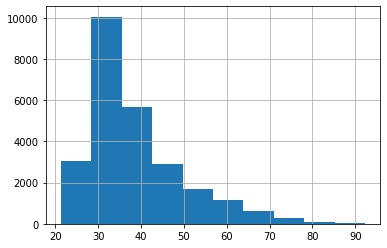

In [ ]:
import matplotlib.pyplot as mpl

merge_final['age'].hist()

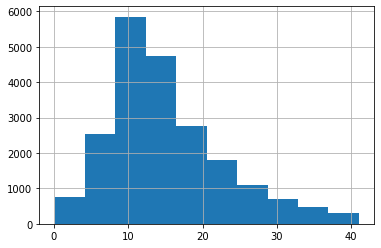

In [ ]:
merge_final['workyear'].hist()

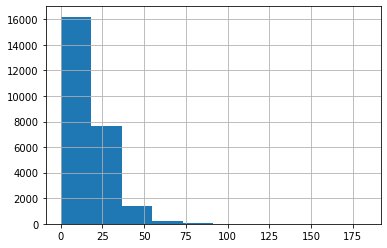

In [ ]:
merge_final['seniority'].hist()

## Build a model

In [ ]:
XY = merge_train.dropna()

In [ ]:
# Choose X variables other than age
X = XY.loc[:, XY.columns!='age']
# also exclude user_id because these are strings.
X = X.loc[:, X.columns!='user_id']

#target variable is age
Y = XY['age']

In [ ]:
X 

,workyear,seniority
0,14.030137,19.585092
1,37.460274,36.921271
2,15.531507,13.962989
4,17.446575,8.792237
5,11.780822,16.384932
...,...,...
25529,20.282192,15.551945
25531,19.953425,16.970875
25532,17.279452,17.217123
25533,11.191781,15.606050


In [ ]:
Y.shape

(21006,)

In [ ]:
Y

0        39.282192
1         60.29863
2        32.279452
4        43.284932
5        33.279452
           ...    
25529    41.284932
25531    47.287671
25532    47.287671
25533    36.282192
25534    27.273973
Name: age, Length: 21006, dtype: object

In [ ]:
# randomly assign some data to the test-set and the rest to the training-set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [ ]:
X_train.shape

(16804, 2)

In [ ]:
Y_train.shape

(16804,)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

kfold = 5

lr = LinearRegression()
lr.fit(X_train, Y_train)

ols = np.mean(cross_val_score(lr, X_train, Y_train, cv=kfold, scoring="r2"))

#training and test scores
print("Training Set Score: {:.2f}".format(lr.score(X_train, Y_train)))
print("Test Set Score: {:.2f}".format(lr.score(X_test, Y_test)))

# Kfold cross validation
print("KFold Cross Validation:{:.2f}".format(ols))

Training Set Score: 0.51
Test Set Score: 0.48
KFold Cross Validation:0.51


In [ ]:
#try scaling the data to see if it will result in higher accuracy.
from sklearn import preprocessing

# Here, I standardize by X data using StandardScalar
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#linear regression on scaled data 

lr = LinearRegression().fit(X_train_scaled, Y_train)
OLS_scaled = np.mean(cross_val_score(lr, X_train_scaled, Y_train))

# training and test set score
print("Training set score: {:.3f}".format(lr.score(X_train_scaled, Y_train)))
print("Test set score: {:.3f}".format(lr.score(X_test_scaled, Y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.3f}".format(np.mean(cross_val_score(lr, X_train_scaled, Y_train))))


Training set score: 0.505
Test set score: 0.483
Mean Cross-Validation, Kfold: 0.505


In [ ]:
#the accruacy of my model is similar whether the data is scaled or not.

In [ ]:
#Predictions 

pred_Y_test = lr.predict(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
Y_test.shape

(4202,)

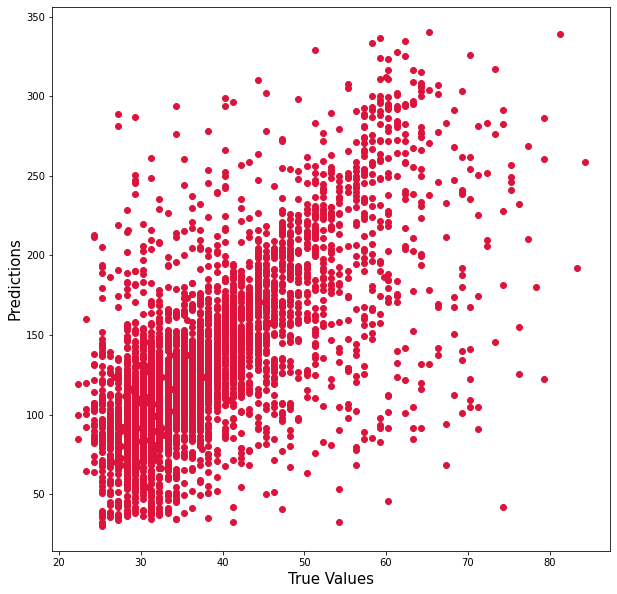

In [ ]:
#There is a direct relationship between the two variables, which means model predicts accurately.

plt.figure(figsize=(10,10))
plt.scatter(Y_test, pred_Y_test, c='crimson')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.show()

In [ ]:
#try to predict the age using a new input(a pre-made dataset that has unused user_ids for age calculation)

X_new = merge_other_job_pos[['seniority','workyear']]

Y_new_pred = lr.predict(X_new)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
merge_other_job_pos['age'] = Y_new_pred

In [ ]:
merge_other_job_pos['true_or_predicted'] = 'predicted'
merge_other_job_pos

,user_id,seniority,workyear,age,true_or_predicted
0,++5qk2+uEmkI/3Z4FrBwDw4ZM3TcQvn1bQ/jHgHWG0kf/b...,10.665753,37.545205,77.490799,predicted
1,++6+hv3i5RAVsrWO8q5JEQ5+2cvffV/mNepQVJd0smgtpB...,34.692158,7.860274,291.874110,predicted
2,++7kB6m0hI1TgAPmyY1X6A5+2cvffV/mNepQVJd0smgtpB...,32.580986,24.369863,257.757024,predicted
3,++9DtAOTiRRvECoMIpKbmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,14.120908,15.279452,128.101736,predicted
4,++Bu40VW3TpqnNRejHUsow5+2cvffV/mNepQVJd0smgtpB...,25.268493,7.273973,221.230302,predicted
...,...,...,...,...,...
55724,zzP7zTK3JaSeTqz9AtikLg5+2cvffV/mNepQVJd0smgtpB...,22.559653,8.945205,198.901508,predicted
55725,zzVjGj6yusqUwYDuy+sXmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,16.159846,30.60274,126.683363,predicted
55726,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,14.064917,17.69863,125.019135,predicted
55727,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,4.610625,30.290411,39.658988,predicted


In [ ]:
merge_train['true_or_predicted'] = 'true'
merge_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,user_id,workyear,seniority,age,true_or_predicted
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,14.030137,19.585092,39.282192,true
1,ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/b...,37.460274,36.921271,60.29863,true
2,QUs/KweU0yMBVoO7pkg5PA5+2cvffV/mNepQVJd0smgtpB...,15.531507,13.962989,32.279452,true
3,jQ4VW6tIpKX4Nola+m/5bQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,NaN,11.534890,29.276712,true
4,eDOp1EUVFso1NvHEKx4oSw5+2cvffV/mNepQVJd0smgtpB...,17.446575,8.792237,43.284932,true
...,...,...,...,...,...
25531,zOmkQXgpXeuNdLPP33grMw5+2cvffV/mNepQVJd0smgtpB...,19.953425,16.970875,47.287671,true
25532,jRp0G2i8/xctae8mqJMTT2EeezRFo+61bQ/jHgHWG0kf/b...,17.279452,17.217123,47.287671,true
25533,P/gSxJbxATJErQMY2XuJRg5+2cvffV/mNepQVJd0smgtpB...,11.191781,15.606050,36.282192,true
25534,TkjOfaO2yBim6BWT+BHiPw5+2cvffV/mNepQVJd0smgtpB...,15.865753,11.443072,27.273973,true


In [ ]:
merge_true_predict = pd.concat([merge_train, merge_other_job_pos])
merge_true_predict.index = range(len(merge_true_predict))
merge_true_predict

,user_id,workyear,seniority,age,true_or_predicted
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,14.030137,19.585092,39.282192,true
1,ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/b...,37.460274,36.921271,60.29863,true
2,QUs/KweU0yMBVoO7pkg5PA5+2cvffV/mNepQVJd0smgtpB...,15.531507,13.962989,32.279452,true
3,jQ4VW6tIpKX4Nola+m/5bQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,NaN,11.534890,29.276712,true
4,eDOp1EUVFso1NvHEKx4oSw5+2cvffV/mNepQVJd0smgtpB...,17.446575,8.792237,43.284932,true
...,...,...,...,...,...
81260,zzP7zTK3JaSeTqz9AtikLg5+2cvffV/mNepQVJd0smgtpB...,8.945205,22.559653,198.901508,predicted
81261,zzVjGj6yusqUwYDuy+sXmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,30.60274,16.159846,126.683363,predicted
81262,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,17.69863,14.064917,125.019135,predicted
81263,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,30.290411,4.610625,39.658988,predicted


In [ ]:
finaldata = merge_true_predict[['user_id','age', 'true_or_predicted']]
finaldata
# here, predicted ages of 126, 198, etc are resulted as this new input dataset to my model was not processed according to my needs.
#(ie. I did not clean the raw data where the start school date was 1800, or the graduation date happened before the school entered date.)

,user_id,age,true_or_predicted
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,39.282192,true
1,ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/b...,60.29863,true
2,QUs/KweU0yMBVoO7pkg5PA5+2cvffV/mNepQVJd0smgtpB...,32.279452,true
3,jQ4VW6tIpKX4Nola+m/5bQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,29.276712,true
4,eDOp1EUVFso1NvHEKx4oSw5+2cvffV/mNepQVJd0smgtpB...,43.284932,true
...,...,...,...
81260,zzP7zTK3JaSeTqz9AtikLg5+2cvffV/mNepQVJd0smgtpB...,198.901508,predicted
81261,zzVjGj6yusqUwYDuy+sXmg4ZM3TcQvn1bQ/jHgHWG0kf/b...,126.683363,predicted
81262,zzZdW3VGODRxRl2025ZR2w5+2cvffV/mNepQVJd0smgtpB...,125.019135,predicted
81263,zzrNxfUzwZXNkSs15haLyA4ZM3TcQvn1bQ/jHgHWG0kf/b...,39.658988,predicted
